# **Project :- Develop a model to predict the likelihood of employee attrition in a company.**

***1. Import Some Important Library***

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle

***2. Read the CSV file using the Panda library***

In [ ]:
dataset_path = "employee_attrition_dataset.csv"
df = pd.read_csv(dataset_path)

***3. Show first five row of data***

In [ ]:
print("Dataset Preview:")
print(df.head())

Dataset Preview:
   EmployeeID  Age  Gender Department  JobSatisfaction  Salary  \
0           1   50  Female      Sales                1   53064   
1           2   36    Male    Finance                5   55711   
2           3   29    Male    Finance                2   60106   
3           4   42    Male      Sales                3   95458   
4           5   40    Male    Finance                4   46589   

   WorkLifeBalance  YearsAtCompany  TrainingHours  Attrition  
0                3              23             12          1  
1                1               8             31          1  
2                4              13              6          0  
3                3              27             21          0  
4                4              20             41          0  


***4. Check the Missing Value in our Dataset***

In [ ]:
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 EmployeeID         0
Age                0
Gender             0
Department         0
JobSatisfaction    0
Salary             0
WorkLifeBalance    0
YearsAtCompany     0
TrainingHours      0
Attrition          0
dtype: int64


***5. Doing some Statistics calculation in our Data***

In [ ]:
# Basic statistics
print("\nDataset Description:\n", df.describe())


Dataset Description:
         EmployeeID          Age  JobSatisfaction         Salary  \
count  1000.000000  1000.000000      1000.000000    1000.000000   
mean    500.500000    40.947000         3.049000   74355.490000   
std     288.819436    11.160858         1.427809   26227.339929   
min       1.000000    22.000000         1.000000   30112.000000   
25%     250.750000    31.000000         2.000000   51861.500000   
50%     500.500000    42.000000         3.000000   73938.000000   
75%     750.250000    50.000000         4.000000   97106.500000   
max    1000.000000    59.000000         5.000000  119791.000000   

       WorkLifeBalance  YearsAtCompany  TrainingHours    Attrition  
count      1000.000000     1000.000000    1000.000000  1000.000000  
mean          2.556000       15.702000      26.786000     0.199000  
std           1.116293        8.233528      12.804068     0.399448  
min           1.000000        1.000000       5.000000     0.000000  
25%           2.000000      

***6.1 - Plot the Correlation Heatmap***

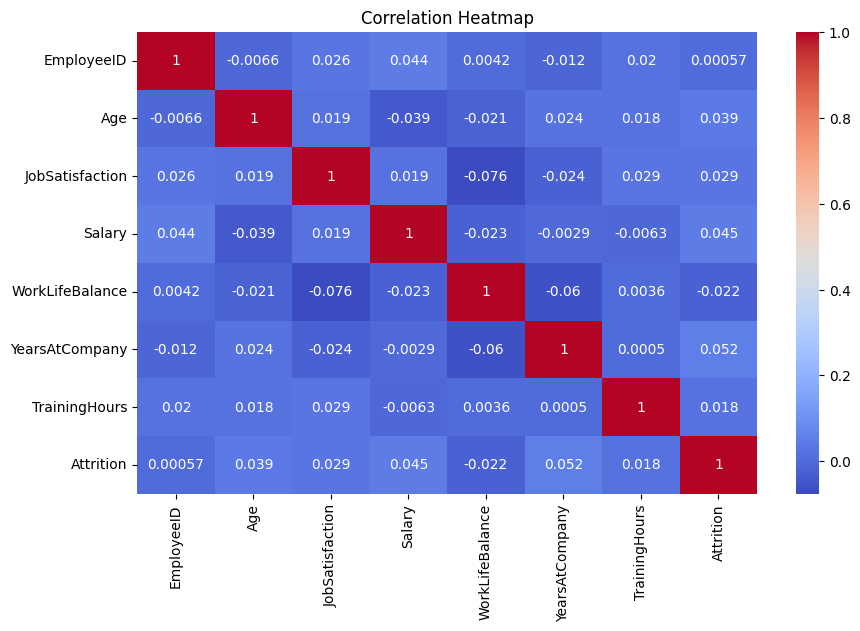

In [ ]:
# Filter only numerical columns for correlation
numerical_df = df.select_dtypes(include=[np.number])

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()



***6.2 - Countplot for target variable***

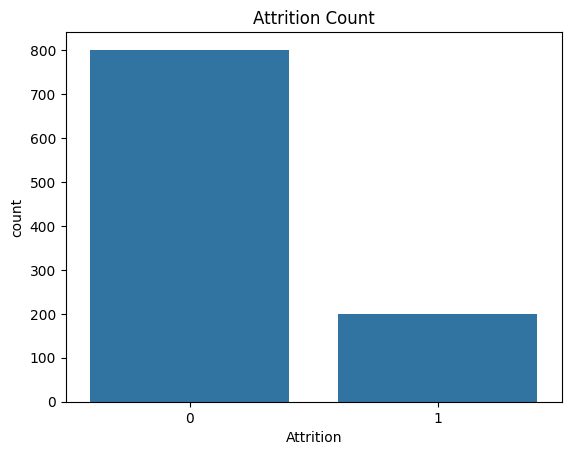

In [ ]:
# Countplot for target variable
sns.countplot(data=df, x="Attrition")
plt.title("Attrition Count")
plt.show()

***6.3 - Show Attrition by Department***

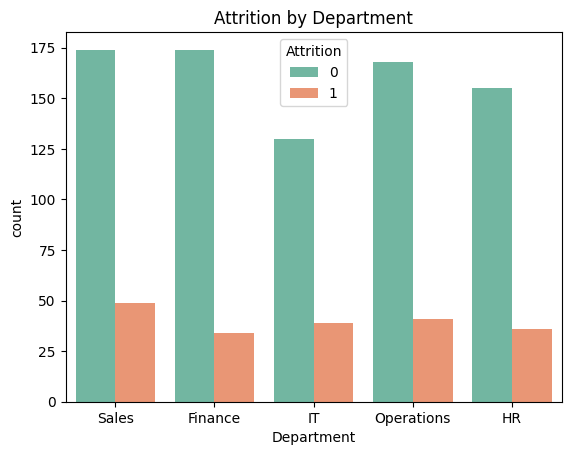

In [ ]:
#Attrition by Department
sns.countplot(data=df, x='Department', hue='Attrition', palette='Set2')
plt.title("Attrition by Department")
plt.show()

***6.4 - Show Attrition by Salary using boxplot***

<ipython-input-25-d34a36525b58>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Attrition", y="Salary", palette="Set2")


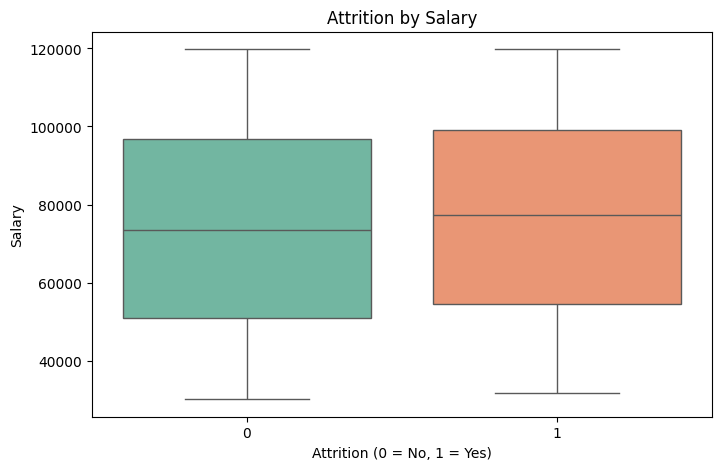

In [ ]:
# Attrition by Salary
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Attrition", y="Salary", palette="Set2")
plt.title("Attrition by Salary")
plt.xlabel("Attrition (0 = No, 1 = Yes)")
plt.ylabel("Salary")
plt.show()

***6.5 - Show attrition by Job Satisfaction using countplot***

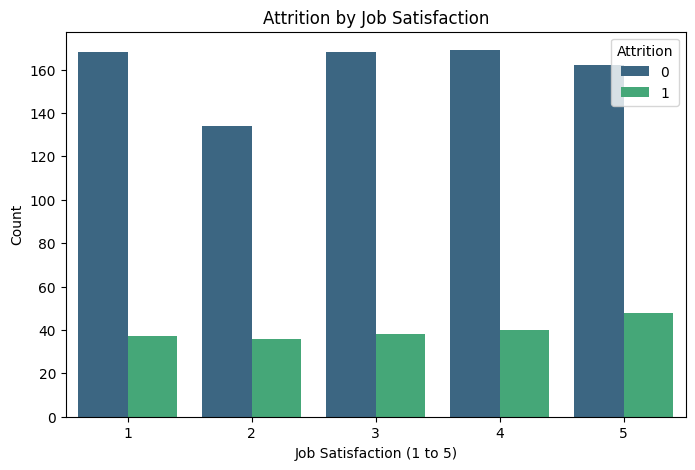

In [ ]:
# Attrition by Job Satisfaction
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="JobSatisfaction", hue="Attrition", palette="viridis")
plt.title("Attrition by Job Satisfaction")
plt.xlabel("Job Satisfaction (1 to 5)")
plt.ylabel("Count")
plt.legend(title="Attrition", loc="upper right")
plt.show()

***7 - Data Preprocessing***

In [ ]:
# Encoding categorical variables
df_encoded = pd.get_dummies(df, columns=["Gender", "Department"], drop_first=True)

In [ ]:
# Splitting features and target variable
X = df_encoded.drop(columns=["Attrition", "EmployeeID"])
y = df_encoded["Attrition"]

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardizing numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

***8 - Feature Selection***

In [ ]:
# Using Recursive Feature Elimination (RFE)
model = LogisticRegression(max_iter=1000)
rfe = RFE(estimator=model, n_features_to_select=5)
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=5)

In [ ]:
# Selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)




Selected Features: Index(['Age', 'Salary', 'YearsAtCompany', 'Department_IT', 'Department_Sales'], dtype='object')


In [ ]:
# Update datasets with selected features
X_train_selected = X_train[:, rfe.support_]
X_test_selected = X_test[:, rfe.support_]

***9 - Model Training***

In [ ]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_selected, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_selected, y_train)

RandomForestClassifier(random_state=42)

***10 - Model Evaluation***

In [ ]:
# Logistic Regression Evaluation
y_pred_log = log_reg.predict(X_test_selected)
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_log))


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.82      1.00      0.90       164
           1       0.00      0.00      0.00        36

    accuracy                           0.82       200
   macro avg       0.41      0.50      0.45       200
weighted avg       0.67      0.82      0.74       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Random Forest Evaluation
y_pred_rf = rf.predict(X_test_selected)
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Report:
               precision    recall  f1-score   support

           0       0.82      0.95      0.88       164
           1       0.10      0.03      0.04        36

    accuracy                           0.78       200
   macro avg       0.46      0.49      0.46       200
weighted avg       0.69      0.78      0.73       200



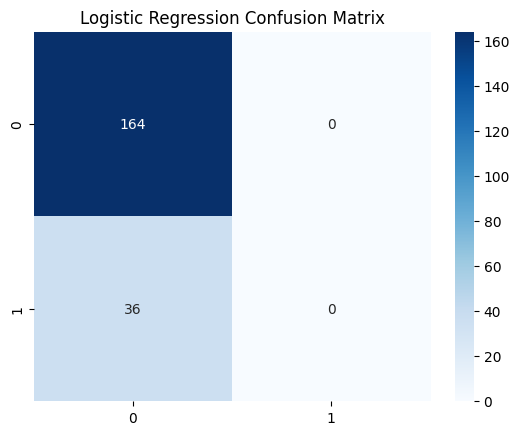

In [ ]:
# Confusion matrix for Logistic Regression
conf_matrix = confusion_matrix(y_test, y_pred_log)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.show()


***11 - Save the model***

In [ ]:
# Save Logistic Regression model
with open("logistic_model.pkl", "wb") as f:
    pickle.dump(log_reg, f)

# Save Random Forest model
with open("random_forest_model.pkl", "wb") as f:
    pickle.dump(rf, f)

print("Models saved successfully!")


Models saved successfully!
